In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
df = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.shape

(1197, 15)

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
df2 = df.drop(['date', 'day'], axis=1)

In [7]:
df2.shape

(1197, 13)

In [8]:
#Handing Missing Values
df2.isnull().sum()

quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df3 = df2.fillna({'wip': 0,})

In [10]:
df3.isnull().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

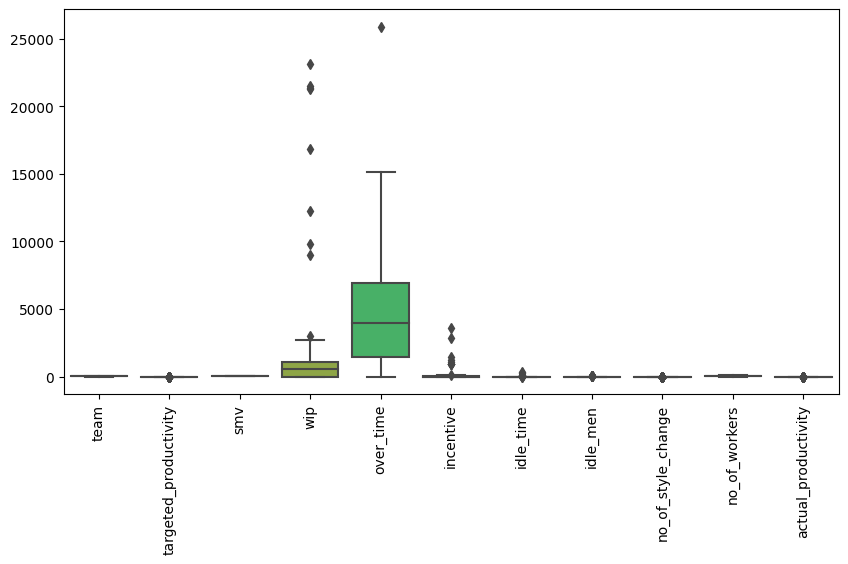

In [13]:
#Outliers Detection and Removal
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df3, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [15]:
#Removing Outliers for 'incentive' column
Q1 = df3.incentive.quantile(0.25)
Q3 = df3.incentive.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df3[(df3.incentive<lower_limit)|(df3.incentive>upper_limit)]
df4 = df3[(df3.incentive>lower_limit)&(df3.incentive<upper_limit)]
df4.shape

(1186, 13)

In [16]:
#Removing Outliers for 'wip' column
Q1 = df4.wip.quantile(0.25)
Q3 = df4.wip.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df4[(df4.wip<lower_limit)|(df4.wip>upper_limit)]
df5 = df4[(df4.wip>lower_limit)&(df4.wip<upper_limit)]
df5.shape

(1177, 13)

In [17]:
#Removing Outliers for 'over_time' column
Q1 = df5.over_time.quantile(0.25)
Q3 = df5.over_time.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df5[(df5.over_time<lower_limit)|(df5.over_time>upper_limit)]
df6 = df5[(df5.over_time>lower_limit)&(df5.over_time<upper_limit)]
df6.shape

(1176, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

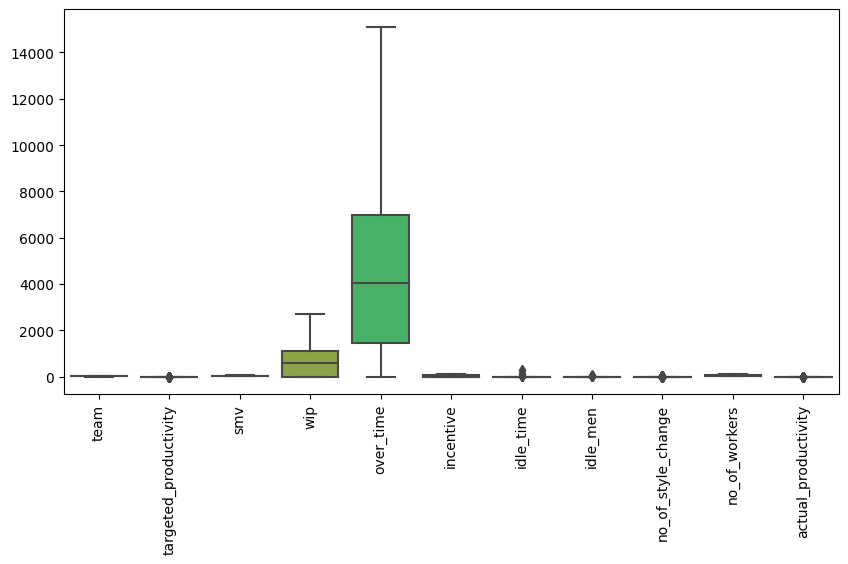

In [18]:
#after removing outliers
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df6, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0, df6.shape[1]):
    if df6.dtypes[i]=='object':
        df6[df6.columns[i]] = le.fit_transform(df6[df6.columns[i]])

<ipython-input-20-fb267b5331dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[df6.columns[i]] = le.fit_transform(df6[df6.columns[i]])
<ipython-input-20-fb267b5331dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[df6.columns[i]] = le.fit_transform(df6[df6.columns[i]])


In [21]:
x = df6.drop(['actual_productivity'], axis=1)
y = df6.actual_productivity
x.shape, y.shape

((1176, 12), (1176,))

In [22]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [23]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])
x.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,-1.160117,0.780739,0.455616,0.720481,1.008608,0.926217,0.760786,2.413020,-0.057985,-0.114022,-0.355135,1.097504
1,-1.160117,-0.468444,-1.571751,0.209020,-1.018120,-1.019391,-1.102067,-0.847073,-0.057985,-0.114022,-0.355135,-1.201499
2,-1.160117,0.780739,1.324487,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
3,-1.160117,0.780739,1.614110,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
4,-1.160117,0.780739,-0.123632,0.720481,0.984893,1.035087,-0.809855,0.816240,-0.057985,-0.114022,-0.355135,0.962269


**DATA VISUALISATION**

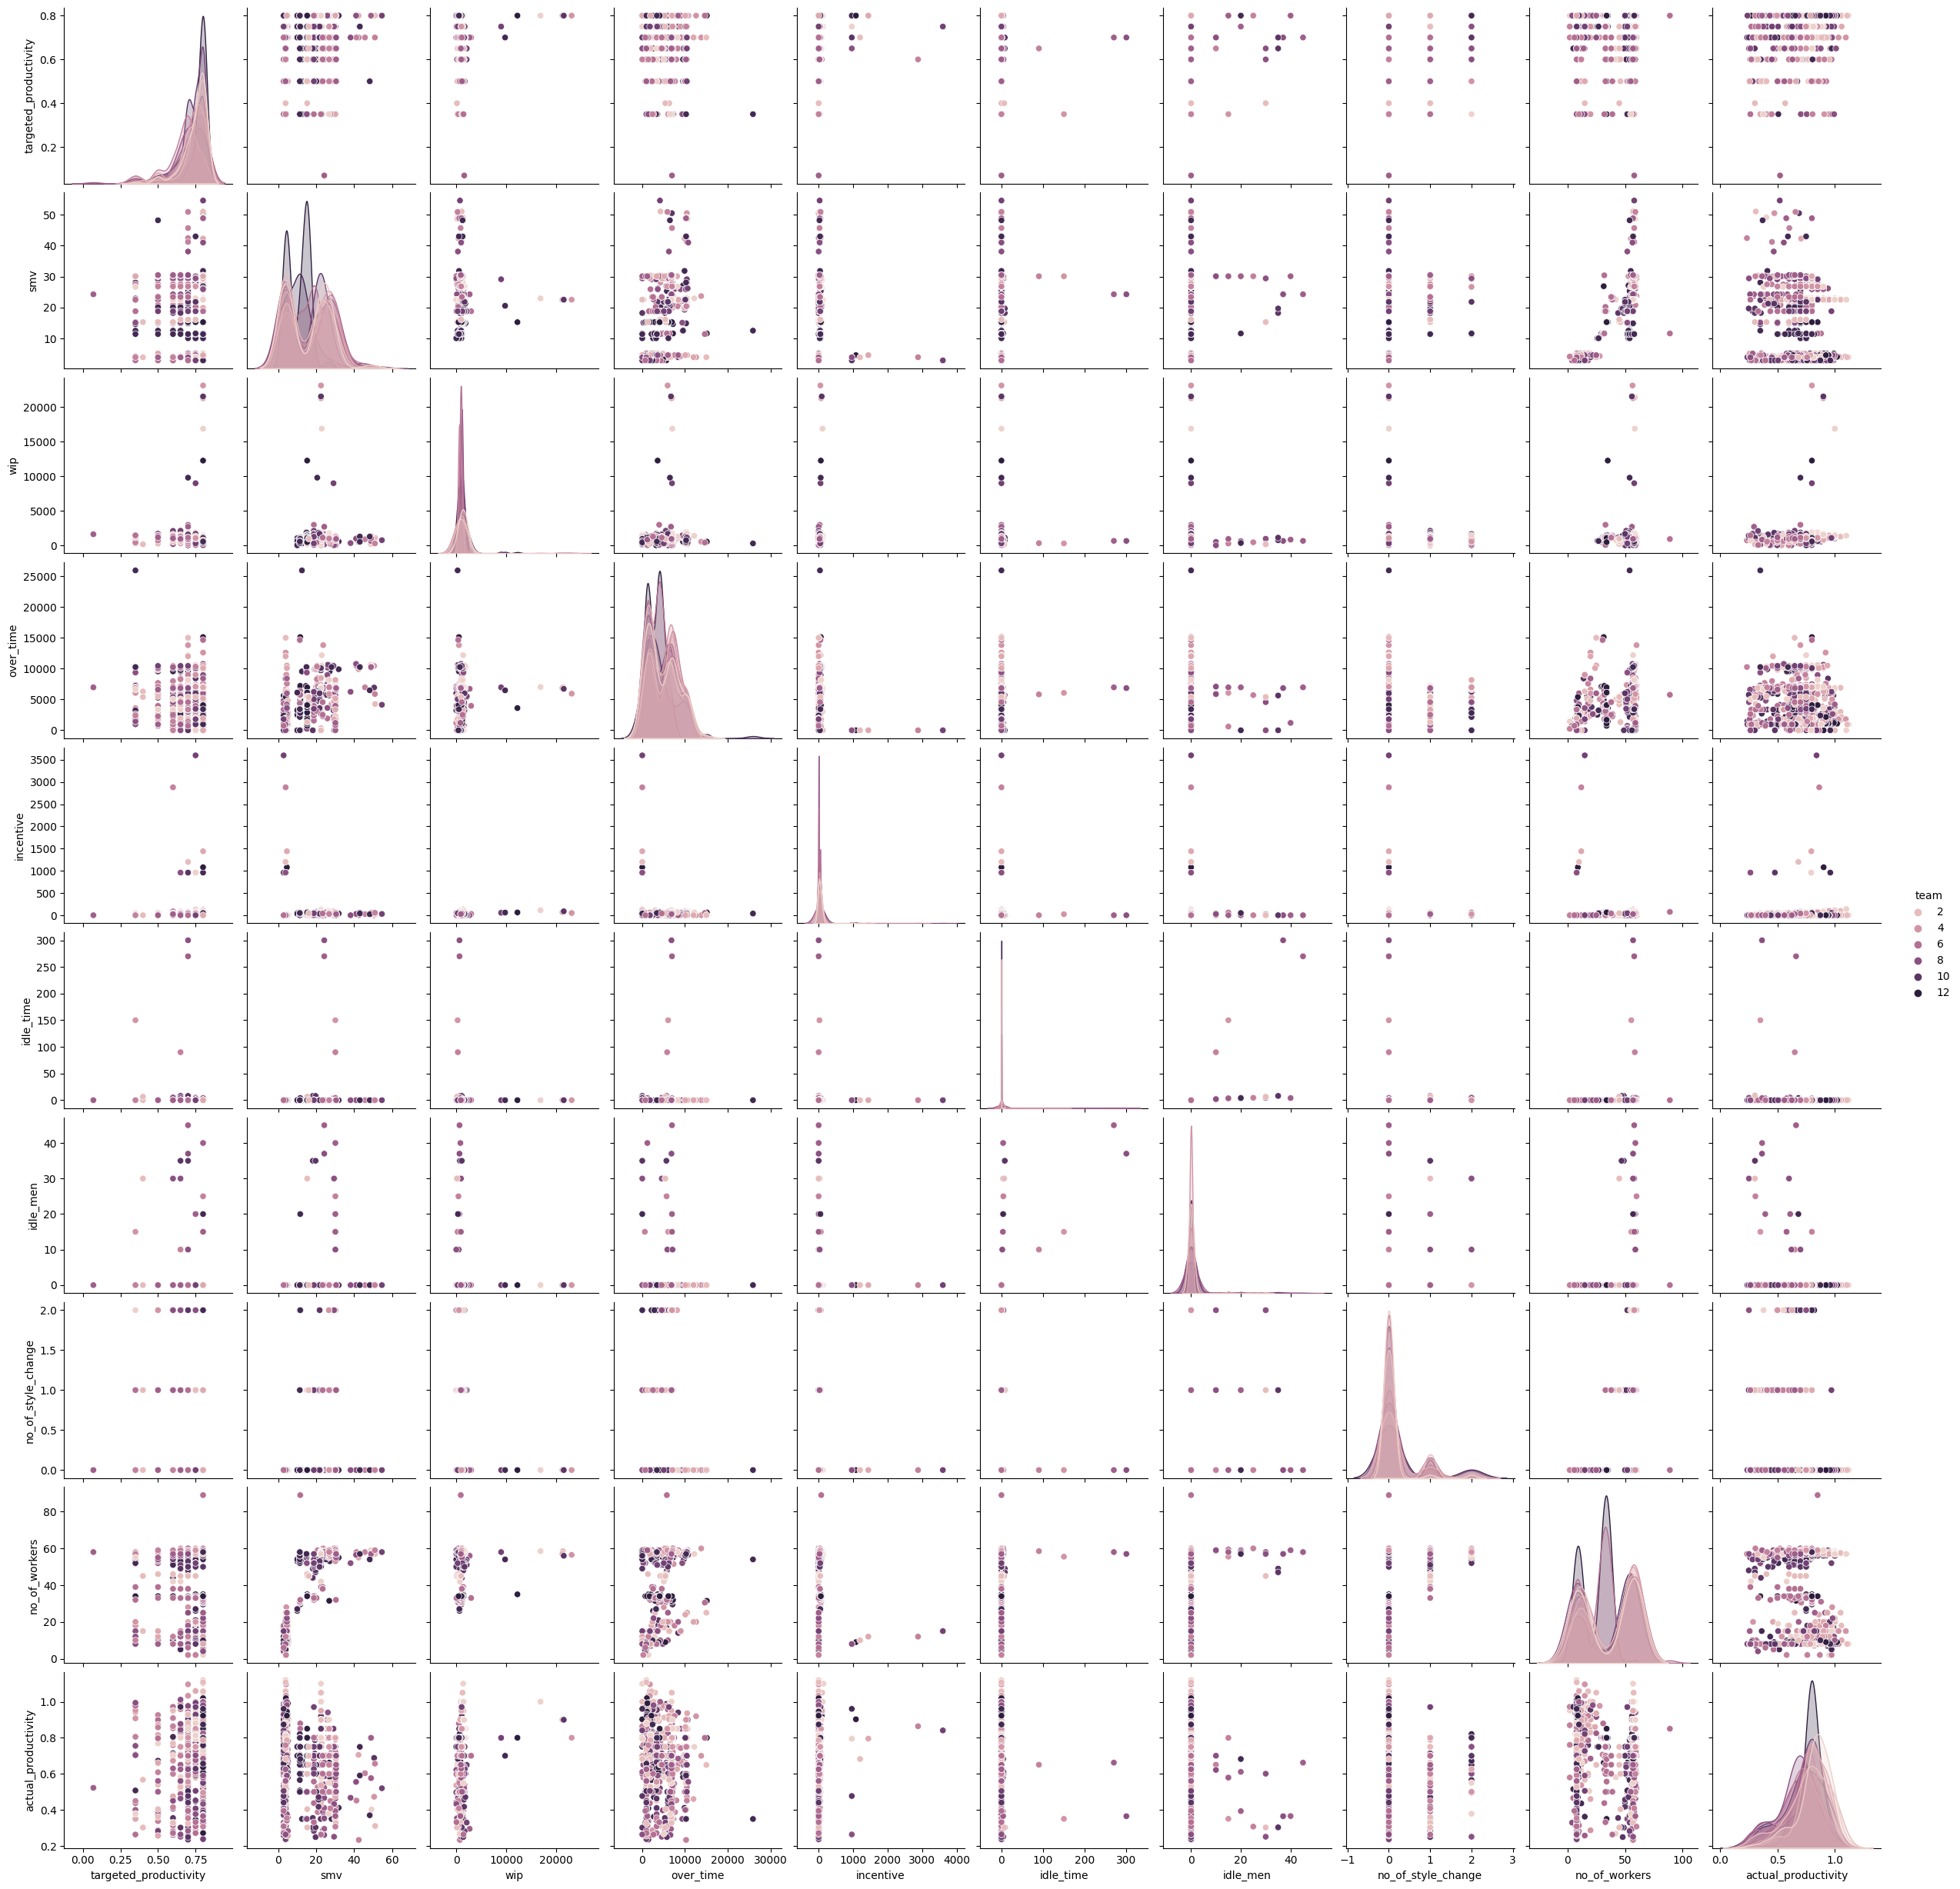

In [57]:
sns.pairplot(df,hue = "team")

<Axes: >

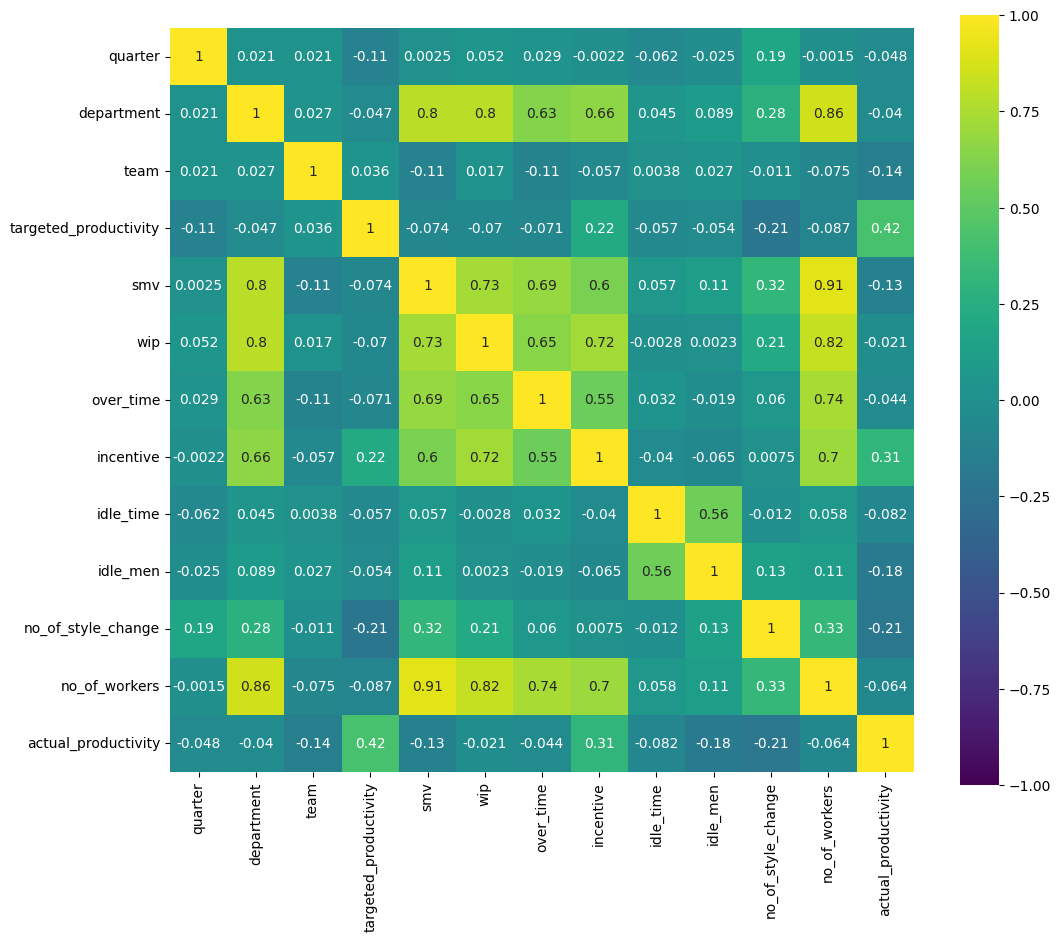

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df6.corr(), annot=True,vmin=-1,vmax=1,cmap='viridis',square=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

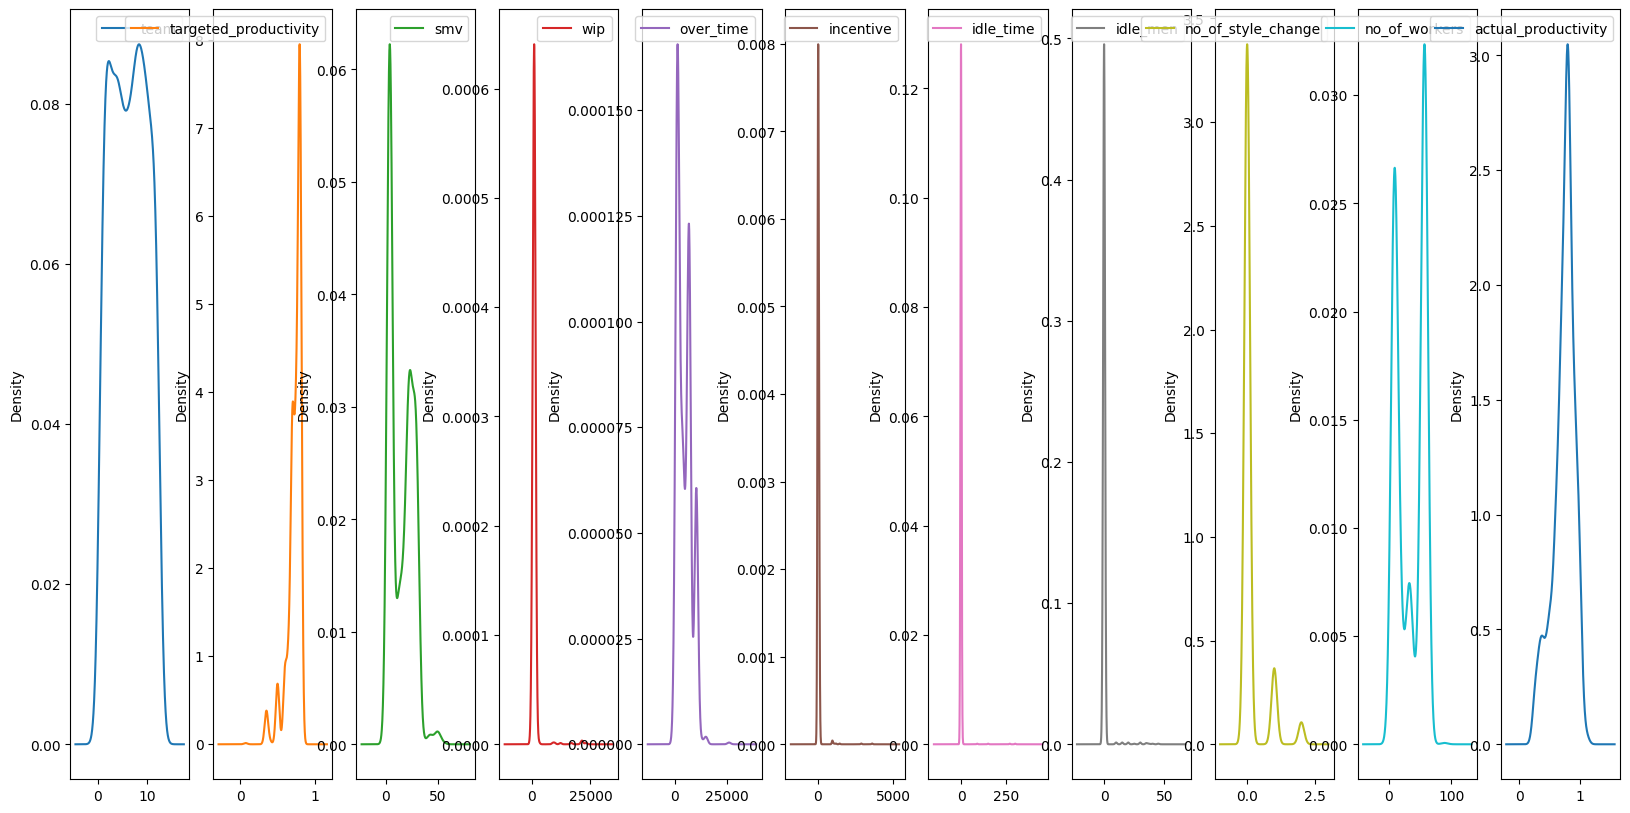

In [53]:
df.iloc[:, 1:].plot.density(subplots=True, layout=(1,11), figsize=(20, 10), sharex = False)

<Axes: xlabel='day', ylabel='wip'>

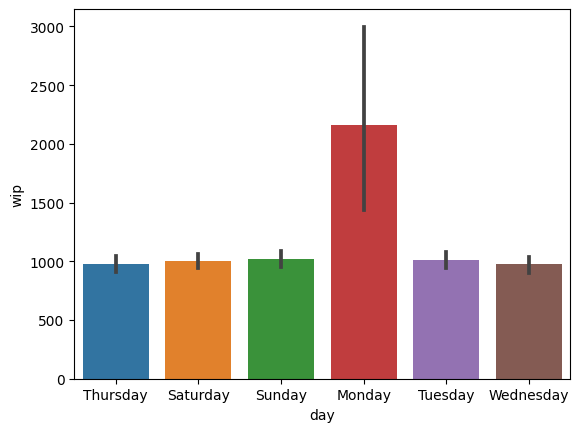

In [55]:
df_wip = df[df.wip > 0]
sns.barplot(x="day", y="wip", data=df_wip)

<ipython-input-59-a24f112ca42c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = df["date"], y = df_diff, ci = None)


<Axes: xlabel='date'>

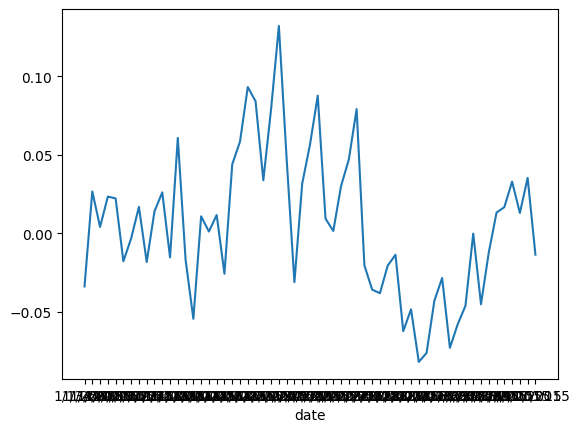

In [59]:
#actual to targer productivity ratio
df_diff = df["actual_productivity"] - df["targeted_productivity"]
sns.lineplot(x = df["date"], y = df_diff, ci = None)

In [60]:
#splitting of training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 12)
(353, 12)
(823,)
(353,)


In [69]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
accuracy=linreg.score(x,y)*100
print(accuracy)

36.168959680150614


In [71]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
accuracy=knn.score(x,y)*100
print(accuracy)

57.571475029346665


In [73]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
accuracy=svr.score(x,y)*100
print(accuracy)

52.439651895252794


In [77]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
accuracy=dt.score(x,y)*100
print(accuracy)

73.44872593047607


In [78]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor(random_state=42)
randf.fit(x_train,y_train)
accuracy=randf.score(x,y)*100
print(accuracy)

77.71129429654384


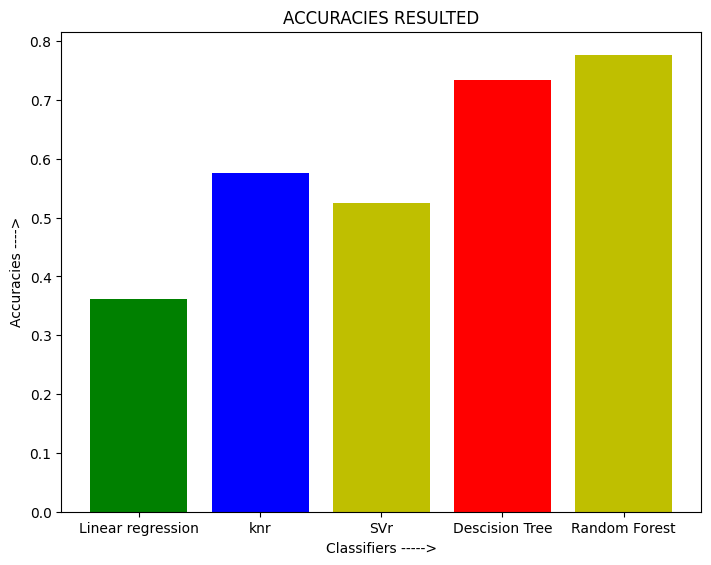

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['Linear regression','knr','SVr','Descision Tree','Random Forest']
accuracy = [linreg.score(x,y),knn.score(x,y),svr.score(x,y),dt.score(x,y),randf.score(x,y)]
ax.bar(algo[0],accuracy[0],color = 'g')
ax.bar(algo[1],accuracy[1],color = 'b')
ax.bar(algo[2],accuracy[2],color = 'y')
ax.bar(algo[3],accuracy[3],color = 'r')
ax.bar(algo[4],accuracy[4],color = 'y')
plt.xlabel('Classifiers ----->')
plt.ylabel('Accuracies ---->')
plt.title('ACCURACIES RESULTED')
plt.show()